In [1]:
seed = 42  # for reproducibility

# Imports
import os
import sys
import enum
import copy
import random
import tempfile
import warnings
import multiprocessing
import numpy as np
import pandas as pd
import nibabel as nib
import SimpleITK as sitk
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython import display

# import visdom
from pathlib import Path
from tqdm import tqdm
from scipy import stats

import torch
import torch.nn.functional as F
from torchvision.utils import make_grid, save_image
torch.manual_seed(seed)
import torchio as tio
sys.path.append(str(Path().absolute().parent))
sys.path.append(str(Path().absolute().parent.parent))
from classification import data_loader

In [2]:
DDSM_mass_path = Path('/home/linardos/Datasets/DDSM/Images/CBIS-DDSM/Mass')
train_path = DDSM_mass_path.joinpath('Train')

In [5]:
csv_file = pd.read_csv(Path('/home/linardos/Datasets/CBIS-DDSM-NIFTI/report_processed_mass_case_description_train_set.csv'))
# csv_file = pd.read_csv(Path('/home/linardos/workenv/breast/src/data_handling/report_processed_mass_case_description_train_set.csv'))

In [6]:
np.unique(csv_file.status.values)

array(['FAIL', 'OK'], dtype=object)

In [7]:
np.sum(csv_file.status.values=='FAIL')

65

In [8]:
csv_file.status.values.__len__()

1318

# 65 fails

In [9]:
d = data_loader.BreastDataLoader()
t, v = d.get_dataset(1)

Loading /home/linardos/Datasets/CBIS-DDSM-NIFTI/Train
Total number of subject instances is 3133
Normal count is 1724
Rest is 1409
{'MALIGNANT', 'BENIGN'}
Fold 1, Training set length: 2506, validation: 627
Training set: 2506 subjects
Validation set: 627 subjects


In [10]:
for i, batch in enumerate(t):
    pathol = batch['pathology']
    print(pathol)
    if pathol=='BENIGN':
        break

MALIGNANT
MALIGNANT
MALIGNANT
BENIGN


In [11]:
batch['img']['data'].shape

torch.Size([1, 256, 256, 1])

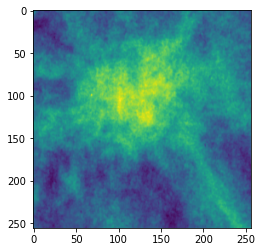

In [13]:
plt.imshow(batch['img']['data'].squeeze(0))

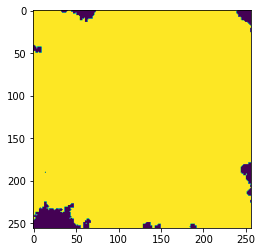

In [14]:
plt.imshow(batch['mask']['data'].squeeze(0))

In [36]:
batch['pathology']

'BENIGN'

In [13]:
v[1]['img']['data'].shape

KeyError: 1

In [ ]:
plt.imshow(v[3]['img']['data'][...,0].squeeze(0))

In [ ]:
v[3]['img']['data'].shape

In [ ]:
plt.imshow(v[3]['img']['data'][0,...,0], cmap='gray')

In [ ]:
plt.imshow(v[3]['mask']['data'][...,0].squeeze(0))

In [ ]:
t, v = d.load(0)
one = next(iter(t))

In [ ]:
import torchvision
inputs = one['img']['data']
img_grid = torchvision.utils.make_grid(inputs[:,0,...,0].unsqueeze(1), normalize=True, scale_each=True)

In [ ]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter(log_dir='/home/linardos/workenv/mnm/src/visualizations/log')

In [ ]:
for img in img_grid:
    plt.imshow(img, cmap='gray')

In [ ]:
# https://discuss.pytorch.org/t/tensorboard-image-quality-lower-than-matplotlib/58233/4
writer.add_image('MRI', img_grid)
writer.close()

In [ ]:
t, v = d.get_dataset(0)


In [ ]:
show_subject(t[10], 'mri')

In [ ]:
mri = one['mri']['data'][0][0]
mask = one['gt']['data'][0][0]

In [ ]:
mask.shape

In [ ]:
lv = torch.zeros(mask.shape)
lv[mask==1]=1